In [2]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from loaddatastructs import *
from helperfuncs import *
from plottingfuncs import *

In [3]:
Archive.gridsize = 100

Archive.archive_path = '/data/keeling/a/sf20/e/wrf-partmc-gridded-output'
Archive.addScenario(scenario_name='uniform-basecase', slurm_id=9349651)
Archive.addScenario(scenario_name='point-source-1x1', slurm_id=9349653)
Archive.archive_path = '/data/nriemer/d/sf20/les_output/wrf-partmc'
Archive.addScenario(scenario_name='fx1fy0', slurm_id=9386112)
Archive.addScenario(scenario_name='road-10x', slurm_id=9386113)

# Scenarios to evaluate ccn activity in complete absence of ammonia
Archive.addScenario(scenario_name='uniform-basecase-no-nh4', slurm_id=2008005)
Archive.addScenario(scenario_name='point-source-1x1-no-nh4', slurm_id=2008006)

#### SNA Profiles

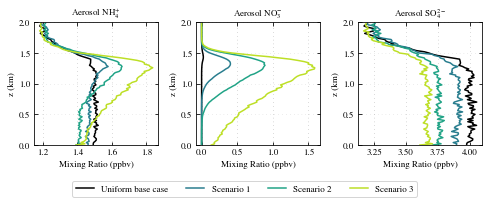

In [5]:
t = 36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'
                                            ], variables=['pmc_NH4', 'pmc_NO3', 'pmc_SO4', #'pmc_H2O', 
                                                                                          #'pmc_ARO1'
                                                                                          ], 
                                 time=t, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 fig_xsize=6.9, fig_ysize=2.7,
                                 global_fontsize=9,
                                 grid_linewidth=0.6,
                                 savefig=True,
                                 filename=f'aerosol-SNA-vertical-profiles-time{t}.pdf'
                                 )

/data/keeling/a/sf20/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/data/keeling/a/sf20/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/data/keeling/a/sf20/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/data/keeling/a/sf20/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


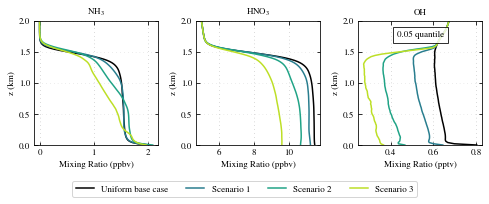

In [142]:
t = 36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'
                                            ], variables=['nh3', 'hno3', 'oh' ], 
                                 time=t, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 fig_xsize=6.9, fig_ysize=2.7,
                                 global_fontsize=9,
                                 grid_linewidth=0.6,
                                 vars_to_quantile={'oh': 0.05},
                                 savefig=True,
                                 filename=f'aerosol-gas-vertical-profiles-time{t}.pdf'
                                 )

Below are vertical profiles of the $5^{th}$ quantile of OH concentration at each vertical level. OH concentrations are lowest in regions overtop the emissions plume. Therefore, this shows that as emissions SH increases, the OH concentration near the emissions plume decreases, supporting the hypothesis that greater emissions SH leads to increased competition for OH.

/data/keeling/a/sf20/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/data/keeling/a/sf20/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/data/keeling/a/sf20/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


uniform-basecase, conc at 1 km: 0.61
fx1fy0, conc at 1 km: 0.52
road-10x, conc at 1 km: 0.37
point-source-1x1, conc at 1 km: 0.28


/data/keeling/a/sf20/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


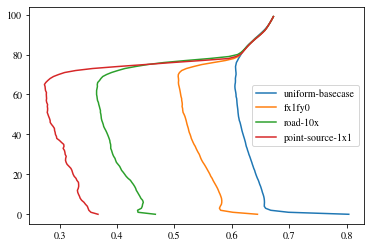

In [7]:
variable = 'oh'

for j, scenario in enumerate(list(Archive.getScenarioSH().keys())):
    quantile = 1e6*np.quantile(Archive.aero_data[scenario][variable][36, :, :, :], 0.05, axis=(1,2))
    plt.plot(quantile, np.arange(100), label=scenario)
    print(f"{scenario}, conc at 1 km: {quantile[50]:3.2f}")
plt.legend()

/tmp/ipykernel_190539/811812523.py:10: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=.3)


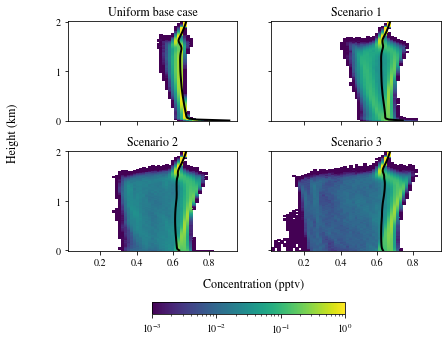

In [31]:
t = 36
var = 'oh'
nbins = 50
norm = matplotlib.colors.LogNorm(vmin=.001, vmax=1)
#Archive.aero_data['point-source-1x1']['oh'][36, 0, :, :]
fig, ax = plt.subplots(2,2, figsize=(6.7,5.5), sharey=True, sharex=True, layout='constrained')
var_max = Archive.aero_data['point-source-1x1'][var][t, :, :, :].max()#np.quantile(Archive.aero_data['point-source-1x1'][var][t, :, :, :], 0.99)
var_min = Archive.aero_data['point-source-1x1'][var][t, :, :, :].min()#np.quantile(Archive.aero_data['point-source-1x1'][var][t, :, :, :], 0.01)
genlabels = Archive.getScenarioGeneralLabels()
plt.subplots_adjust(hspace=.3)
for ax, scenario in zip(ax.flatten(), list(Archive.getScenarioSH().keys())):

    bins = np.linspace(var_min, var_max, nbins)

    hist2d = np.zeros((100, nbins-1))
    mean_arr = np.zeros((100))
    for i in range(100):
        hist, bins = np.histogram(Archive.aero_data[scenario][var][t, i, :, :], bins, density=False)
        hist = hist/hist.sum()
        hist2d[i, :] = hist

        mean_val = Archive.aero_data[scenario][var][t, i, :, :].mean(axis=(0, 1))
        mean_arr[i] = mean_val
    
    x=bins[:-1]
    y=np.linspace(0, 2, 100)
    c = ax.pcolormesh(1e6*x, y, hist2d, norm=norm,edgecolor='face')
    ax.plot(1e6*mean_arr, y, lw=2, c='k')
    ax.set_title(genlabels[scenario])
    #ax.set_xticklabels(bins[::10])
fig.subplots_adjust(bottom=0.3)
cbar_ax = fig.add_axes([0.3, 0.14, 0.4, 0.03])
fig.colorbar(c, cax=cbar_ax, orientation='horizontal')
fig.supxlabel('Concentration (pptv)', y=.2, x=.51)
fig.supylabel('Height (km)', x=0, y=.6)
#fig.colorbar(c, ax=ax, orientation='horizontal')
plt.savefig("oh-histogram-test.pdf", bbox_inches="tight", format="pdf")

/data/keeling/a/sf20/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


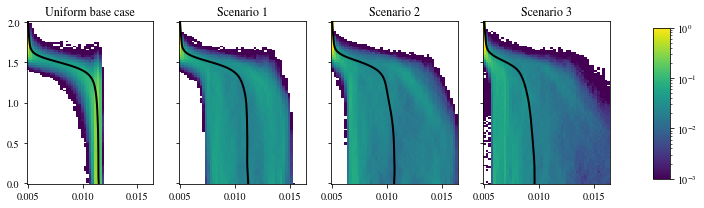

In [162]:
t = 36
var = 'hno3'
nbins = 50
norm = matplotlib.colors.LogNorm(vmin=.001, vmax=1)
#Archive.aero_data['point-source-1x1']['oh'][36, 0, :, :]
fig, ax = plt.subplots(1,4, figsize=(12,3), sharey=True)
var_max = np.quantile(Archive.aero_data['point-source-1x1'][var][t, :, :, :], 0.98)
var_min = np.quantile(Archive.aero_data['point-source-1x1'][var][t, :, :, :], 0.02)
genlabels = Archive.getScenarioGeneralLabels()
for ax, scenario in zip(ax.flatten(), list(Archive.getScenarioSH().keys())):

    bins = np.linspace(var_min, var_max, nbins)

    hist2d = np.zeros((100, nbins-1))
    mean_arr = np.zeros((100))
    for i in range(100):
        hist, bins = np.histogram(Archive.aero_data[scenario][var][t, i, :, :], bins, density=False)
        hist = hist/hist.sum()
        hist2d[i, :] = hist

        mean_val = Archive.aero_data[scenario][var][t, i, :, :].mean(axis=(0, 1))
        mean_arr[i] = mean_val
    
    x=bins[:-1]
    y=np.linspace(0, 2, 100)
    c = ax.pcolormesh(x, y, hist2d, norm=norm)
    ax.plot(mean_arr, y, lw=2, c='k')
    ax.set_title(genlabels[scenario])
    #ax.set_xticklabels(bins[::10])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(c, cax=cbar_ax)
#fig.colorbar(c, ax=ax, orientation='horizontal')

Below is a 1-d cross section of the domain in the upper BL across a horizontal line at x=5 km. This illustrates how OH levels overtop of the emissions plume are increasingly depleted as emissions SH increases.

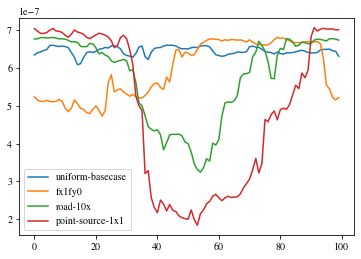

In [149]:
t = 36
z = 45
variable = 'oh'

for j, scenario in enumerate(list(Archive.getScenarioSH().keys())):
    scenario_data = Archive.aero_data[scenario]
    variable_data = scenario_data[variable][t, z, :, 50]
    #plt.plot(variable_data.mean(axis=1), label=scenario)
    plt.plot(variable_data, label=scenario)
plt.legend()

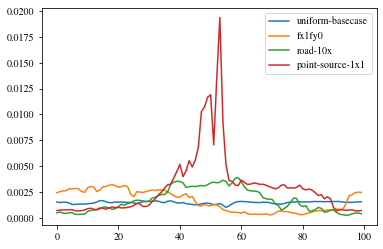

In [155]:
t = 36
z = 45
variable = 'nh3'

for j, scenario in enumerate(list(Archive.getScenarioSH().keys())):
    scenario_data = Archive.aero_data[scenario]
    variable_data = scenario_data[variable][t, z, :, 50]
    #plt.plot(variable_data.mean(axis=1), label=scenario)
    plt.plot(variable_data, label=scenario)
plt.legend()

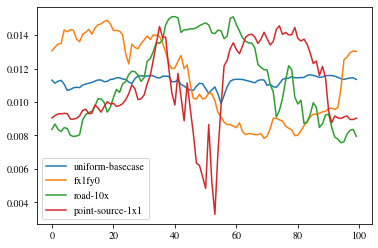

In [152]:
t = 36
z = 45
variable = 'hno3'

for j, scenario in enumerate(list(Archive.getScenarioSH().keys())):
    scenario_data = Archive.aero_data[scenario]
    variable_data = scenario_data[variable][t, z, :, 50]
    #plt.plot(variable_data.mean(axis=1), label=scenario)
    plt.plot(variable_data, label=scenario)
plt.legend()

#### Cross section of gas phase species
*Note that $NH_3$ is emitted while $HNO_3$ and $OH$ are chemically produced*. This explains why ammonia has a much heigher SH.

Note: give each species a colorbar

In [4]:
t = 36
z = 45


#fig, axs = plt.subplots(4, 3, figsize=(6, 7), sharex=True, sharey=True)
#plt.subplots_adjust(wspace=0.1)
scenario_general_labels = Archive.getScenarioGeneralLabels()
for j, scenario in enumerate(list(Archive.getScenarioSH().keys())):

    scenario_data = Archive.aero_data[scenario]
    for i, variable in enumerate(['nh3', 'hno3', 'oh']):
    #for i, variable in enumerate(['pmc_NH4', 'pmc_NO3', 'pmc_SO4']):
        variable_data = scenario_data[variable][t, z, :, :]

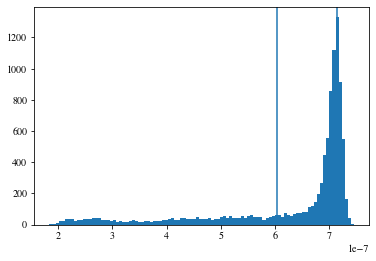

In [24]:
plt.hist(variable_data.flatten(), bins=100)
plt.axvline(np.quantile(variable_data, .25))
plt.axvline(np.quantile(variable_data, .75))


In [4]:
variables = ['nh3', 'hno3', 'oh']
variable_mins = {var: np.nan for var in variables}
variable_maxs = {var: np.nan for var in variables}
for j, scenario in enumerate(list(Archive.getScenarioSH().keys())):
    scenario_data = Archive.aero_data[scenario]
    for i, variable in enumerate(variables):
    #for i, variable in enumerate(['pmc_NH4', 'pmc_NO3', 'pmc_SO4']):
        variable_data = 1e3*scenario_data[variable][t, z, :, :]

        variable_min = variable_mins[variable]
        variable_max = variable_maxs[variable]

        if (np.isnan(variable_min)) or (variable_data.min() < variable_min):
            variable_mins[variable] = variable_data.min()
            

        if (np.isnan(variable_max)) or (variable_data.max() > variable_max):
            variable_maxs[variable] = variable_data.max()
print('min', variable_mins)
print('max', variable_maxs)

min {'nh3': 9.2405027e-14, 'hno3': 3.2789245, 'oh': 0.00011587064}
max {'nh3': 19.356953, 'hno3': 20.904358, 'oh': 0.00074476347}


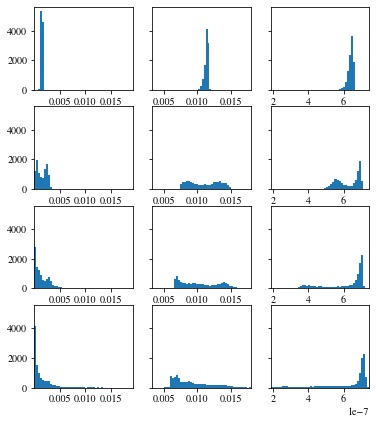

In [82]:
t = 36
z = 45


fig, axs = plt.subplots(4, 3, figsize=(6, 7),  sharey=True)
#plt.subplots_adjust(wspace=0.1)
scenario_general_labels = Archive.getScenarioGeneralLabels()

for j, scenario in enumerate(list(Archive.getScenarioSH().keys())):

    scenario_data = Archive.aero_data[scenario]
    for i, variable in enumerate(['nh3', 'hno3', 'oh']):
    #for i, variable in enumerate(['pmc_NH4', 'pmc_NO3', 'pmc_SO4']):
        variable_data = scenario_data[variable][t, z, :, :]
        ax = axs[j, i]
        
        c = ax.hist(variable_data.flatten(), bins=50, range=(variable_mins[variable], variable_maxs[variable]))
        ax.set_xlim(variable_mins[variable], variable_maxs[variable])

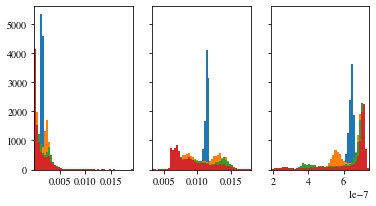

In [86]:
t = 36
z = 45


fig, axs = plt.subplots(1, 3, figsize=(6, 3),  sharey=True)
#plt.subplots_adjust(wspace=0.1)
scenario_general_labels = Archive.getScenarioGeneralLabels()

for i, variable in enumerate(['nh3', 'hno3', 'oh']):    
    for j, scenario in enumerate(list(Archive.getScenarioSH().keys())):

        scenario_data = Archive.aero_data[scenario]
        
        #for i, variable in enumerate(['pmc_NH4', 'pmc_NO3', 'pmc_SO4']):
        variable_data = scenario_data[variable][t, z, :, :]
        ax = axs[i]
        
        c = ax.hist(variable_data.flatten(), bins=50, range=(variable_mins[variable], variable_maxs[variable]))
        ax.set_xlim(variable_mins[variable], variable_maxs[variable])

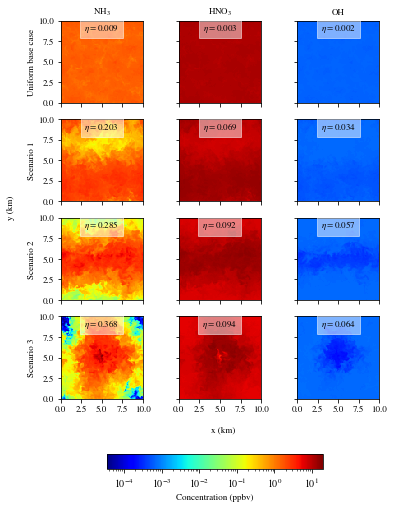

In [ ]:
t = 36
z = 45

fig, axs = plt.subplots(4, 3, figsize=(6, 7), sharex=True, sharey=True)
#plt.subplots_adjust(wspace=0.1)
scenario_general_labels = Archive.getScenarioGeneralLabels()
for j, scenario in enumerate(list(Archive.getScenarioSH().keys())):

    scenario_data = Archive.aero_data[scenario]
    for i, variable in enumerate(['nh3', 'hno3', 'oh']):
    #for i, variable in enumerate(['pmc_NH4', 'pmc_NO3', 'pmc_SO4']):
        variable_data = 1e3*scenario_data[variable][t, z, :, :]
        ax = axs[j, i]

        #vmin = np.quantile(variable_data, .05)
        #vmax = np.quantile(variable_data, .95)
        vmin = min(variable_mins.values())
        vmax = max(variable_maxs.values())
        norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)
        c = ax.pcolormesh(variable_data, norm=norm, #vmin=vmin, vmax=vmax, 
                      cmap='jet',edgecolor='face')

        
        if scenario == 'uniform-basecase':
            ax.set_title(Archive.gas_fmt_map[variable], fontsize=9)
        if i == 0:
            ax.text(-0.4, 0.5, scenario_general_labels[scenario], fontsize=9, transform=ax.transAxes, rotation=90, verticalalignment='center')
        #ax.set_title(variable)
        #ax.set_ylabel('y (km)')
        #ax.set_xlabel('x (km)')
        ax.set_aspect('equal')
        nx, ny, xwidth, ywidth = 100, 100, 10, 10
        ax.set_xticks(np.linspace(0, nx, 5))
        ax.set_xticklabels(np.linspace(0, xwidth, 5), fontsize=9)
        ax.set_yticks(np.linspace(0, ny, 5))
        ax.set_yticklabels(np.linspace(0, ywidth, 5), fontsize=9)

        sh = montecarlospatialhet(variable_data, n_permutes=10000)
        text = ax.text(0.5, 0.88, f'$\eta=${sh:3.3f}', fontsize=9, transform=ax.transAxes, horizontalalignment='center')
        text.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
        #contour_levels = [x for x in np.logspace(np.log10(variable_mins[variable]), np.log10(variable_maxs[variable]), 5)]
        #CS = ax.contour(variable_data, levels=contour_levels,)

fig.subplots_adjust(top=0.95, bottom=0.2)
cbar_ax = fig.add_axes([0.25, 0.06, 0.5, 0.03])
cb = fig.colorbar(c, cax=cbar_ax, orientation='horizontal')
cb.set_label('Concentration (ppbv)',  fontsize=9,)
fig.supxlabel('x (km)', fontsize=9, x=.52, y=.13)
fig.supylabel('y (km)', fontsize=9, y=.58)
#plt.tight_layout()
plt.savefig(f'gas-spatial-heterogeneity-time{t}-z{z}.pdf')

Sulfate is able to enter and stay in the aerosol phase but ammonium and nitrate will equilibrate to gas phase outside of the emission plume core.

In [12]:
variables = ['pmc_NH4', 'pmc_NO3', 'pmc_SO4']
variable_mins = {var: np.nan for var in variables}
variable_maxs = {var: np.nan for var in variables}
for j, scenario in enumerate(list(Archive.getScenarioSH().keys())):
    scenario_data = Archive.aero_data[scenario]
    for i, variable in enumerate(variables):
    #for i, variable in enumerate(['pmc_NH4', 'pmc_NO3', 'pmc_SO4']):
        variable_data = scenario_data[variable][t, z, :, :]

        # convert to mixing ratio (ppbv)
        inverse_airdens = Archive.aero_data[scenario]['ALT'][t, z, :, :]
        variable_data = 1e9*inverse_airdens*variable_data

        variable_min = variable_mins[variable]
        variable_max = variable_maxs[variable]

        if (np.isnan(variable_min)) or (variable_data.min() < variable_min):
            variable_mins[variable] = variable_data.min()
            

        if (np.isnan(variable_max)) or (variable_data.max() > variable_max):
            variable_maxs[variable] = variable_data.max()
print('min', variable_mins)
print('max', variable_maxs)

min {'pmc_NH4': 0.13118368, 'pmc_NO3': 0.0, 'pmc_SO4': 0.34982318}
max {'pmc_NH4': 30.348358, 'pmc_NO3': 99.392944, 'pmc_SO4': 22.129452}


In [28]:
vmax

99.392944

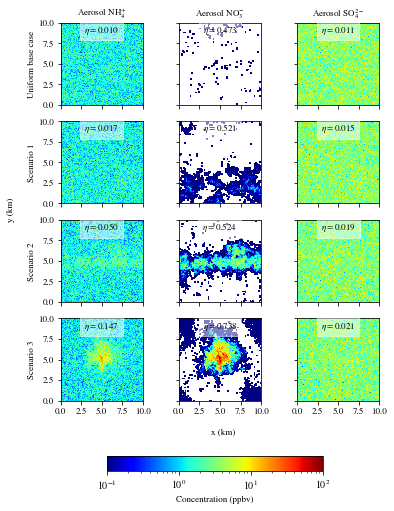

In [30]:
t = 36
z = 45

ion_charges = {'pmc_NH4': '+', 'pmc_NO3': '-', 'pmc_SO4': '2-'}
fig, axs = plt.subplots(4, 3, figsize=(6, 7), sharex=True, sharey=True)
#plt.subplots_adjust(hspace=0.2, wspace=0.1)
scenario_general_labels = Archive.getScenarioGeneralLabels()
for j, scenario in enumerate(list(Archive.getScenarioSH().keys())):
    scenario_data = Archive.aero_data[scenario]
    #for i, variable in enumerate(['oh', 'hno3', 'nh3']):
    for i, variable in enumerate(['pmc_NH4', 'pmc_NO3', 'pmc_SO4']):
        variable_data = scenario_data[variable][t, z, :, :]

        # convert to mixing ratio (ppbv)
        inverse_airdens = Archive.aero_data[scenario]['ALT'][t, z, :, :]
        variable_data = 1e9*inverse_airdens*variable_data

        ax = axs[j, i]

        #vmin = min(variable_mins.values())
        #if vmin == 0:
        #    vmin = 1e-1
        #vmax = max(variable_maxs.values())
        vmin, vmax = 1e-1, 1e2
        norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)
        c = ax.pcolormesh(variable_data, #vmin=vmin, vmax=vmax, 
                          norm=norm, 
                      cmap='jet',
                      edgecolor='face')

        #ax.pcolormesh(variable_data, cmap='viridis',edgecolor='face')

        if scenario == 'uniform-basecase':
            fmt_var_name = Archive.aerosol_fmt_map[variable]
            #ion_charge = ion_charges[variable]
            #fmt_var_name = fmt_var_name[:-1] + '^{' + ion_charges[variable] + '}$'
            ax.set_title(fmt_var_name, fontsize=9)
        if i == 0:
            ax.text(-0.4, 0.5, scenario_general_labels[scenario], fontsize=9, transform=ax.transAxes, rotation=90, verticalalignment='center')
        #ax.set_title(variable)
        #ax.set_ylabel('y (km)')
        #ax.set_xlabel('x (km)')
        ax.set_aspect('equal')
        nx, ny, xwidth, ywidth = 100, 100, 10, 10
        ax.set_xticks(np.linspace(0, nx, 5))
        ax.set_xticklabels(np.linspace(0, xwidth, 5), fontsize=9)
        ax.set_yticks(np.linspace(0, ny, 5))
        ax.set_yticklabels(np.linspace(0, ywidth, 5), fontsize=9)

        sh = montecarlospatialhet(variable_data, n_permutes=10000)
        text = ax.text(0.5, 0.88, f'$\eta=${sh:3.3f}', fontsize=9, transform=ax.transAxes, horizontalalignment='center')
        text.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))

fig.subplots_adjust(top=0.95, bottom=0.2)
cbar_ax = fig.add_axes([0.25, 0.06, 0.5, 0.03])
cb = fig.colorbar(c, cax=cbar_ax, orientation='horizontal')
cb.set_label('Concentration (ppbv)',  fontsize=9,)
fig.supxlabel('x (km)', fontsize=9, x=.52, y=.13)
fig.supylabel('y (km)', fontsize=9, y=.58)
#plt.tight_layout()
plt.savefig(f'TEST-aerosol-SNA-spatial-heterogeneity-time{t}-z{z}.pdf')

#### CCN profiles

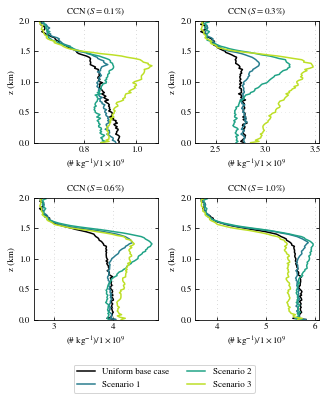

In [ ]:
t=36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'
                                            ], variables=['ccn_001', 'ccn_003', 'ccn_006', 'ccn_010'
                                                                                          ], 
                                 unit_prefactor=1e-9,
                                 time=36, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 fig_xsize=4.66, fig_ysize=5.2,
                                 global_fontsize=9,
                                 grid_linewidth=0.6,
                                 legend_ncols=2,
                                 savefig=True,
                                 filename=f'aerosol-ccn-vertical-profiles-time{t}.pdf'
                                 )

#### CCN Profiles, no ammonia

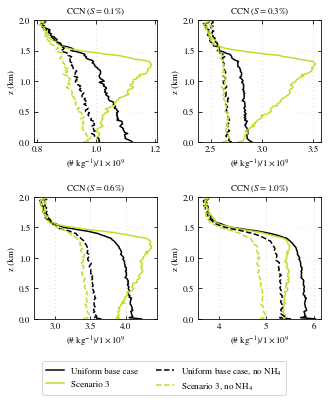

In [5]:
t=36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'point-source-1x1', 'uniform-basecase-no-nh4', 'point-source-1x1-no-nh4'
                                            ], variables=['ccn_001', 'ccn_003', 'ccn_006', 'ccn_010'
                                                                                          ], 
                                 time=36, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 unit_prefactor=1e-9,
                                 fig_xsize=4.66, fig_ysize=5.2,
                                 global_fontsize=9,
                                 grid_linewidth=0.6,
                                 legend_ncols=2,
                                 savefig=True,
                                 filename=f'aerosol-ccn-vertical-profiles-no-nh4-cases-time{t}.pdf'
                                 )

In [9]:
def plot_ScenarioDists(dist_type='num', k=25, time=36, **kwargs):

    #global_fontsize = kwargs.get('global_fontsize', 9)
    # Configurable keyword arguments
    xlims = kwargs.get('xlims', (5e-9, 5e-6))
    if dist_type == 'num':
        ylims = kwargs.get('ylims', (1e7, 1e10))
        scaling_factor = 1 # keep as # m^-3
    if dist_type == 'mass':
        ylims = kwargs.get('ylims', (0, 1e-13))
        scaling_factor=1e9 # convert to micrograms per cubic meter
    yscale = kwargs.get('yscale', 'linear')
    savefig = kwargs.get('savefig', True)
    totconctimeidx=kwargs.get('totconctimeidx', Archive.n_times-1)
    lognorm = kwargs.get('lognorm', False)
    dist_cmap_name = kwargs.get('dist_cmap', 'viridis')
    dist_cmap = plt.get_cmap(dist_cmap_name)
    dist_cmap_normrange = kwargs.get('dist_cmap_norm_range', (0.2, 0.9))
    title_size = kwargs.get('title_size', 10)
    label_size = kwargs.get('label_size', 9)
    local_binning = kwargs.get('local_binning', None)
    legend_loc = kwargs.get('legend_loc', 'upper left')
    legend_ncol = kwargs.get('legend_ncol', 2)
    linewidth = kwargs.get('line_width', 1.5)
    write_legend_labels = kwargs.get('write_legend_labels', False)

    tot_conc_label = kwargs.get('field_var', f'TOT_{dist_type.upper()}_CONC')
    tot_conc_title = kwargs.get('field_title', None)

    dist_ij_loc = {'uniform-basecase': [50, 50],
               'fx1fy0': [50, 25], # 25
               'road-10x': [50, 50],
               'point-source-1x1': [50, 50],
    } 

    if kwargs.get('ax', None):
        ax = kwargs['ax']
    else:  
        fig, ax = plt.subplots(1, 1, figsize=(6.5, 4))
    
    # plot initial condition
    scenario_aerodata = Archive.aero_data['uniform-basecase']
    scenario_distdata = Archive.aerodist_data['uniform-basecase']

    x_vals = []
    bin_vals = []
    bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]
    bin_width = bin_edges[1:] - bin_edges[:-1]
    t0 = 0
    i, j = dist_ij_loc['uniform-basecase']
    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][t0, k, j, i].data.item()#/1e6
        if local_binning:
            bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][t0, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data#/1e6
            bin_data = bin_data.mean()
        bin_vals.append(bin_data)
        x_vals.append(bin_idx)

    if write_legend_labels:
        label = 'Initial Condition'
    else:
        label = None
    ax.plot(scenario_distdata['BIN_CENTERS'][:].data[0], scaling_factor*np.array(bin_vals), 
            label=label, c='k', ls='--', lw=linewidth)

        
    colors = Archive.getScenarioColors()
    labels = Archive.getScenarioGeneralLabels()

    ultrafine_total_conc = {scenario: 0 for scenario in dist_ij_loc}
    accum_total_conc = {scenario: 0 for scenario in dist_ij_loc}
    # get the index of the bin that is the largest less than 50 nm
    cutoff_bin_idx = np.argwhere(scenario_distdata['BIN_EDGES'][0, :] < 5e-8)[-1][0]

    for scenario in dist_ij_loc:
        scenario_aerodata = Archive.aero_data[scenario]
        scenario_distdata = Archive.aerodist_data[scenario]
        i, j = dist_ij_loc[scenario]
        c = colors[scenario]
        
        x_vals = []
        bin_vals = []

        bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]
        bin_width = bin_edges[1:] - bin_edges[:-1]

        for bin_idx in range(100):
            bin_idx += 1 # 1 indexing 
            bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()#/1e6
            if local_binning:
                bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data#/1e6
                bin_data = bin_data.mean()
            bin_vals.append(bin_data)
            x_vals.append(bin_idx)

            # sum up the total concentration in the ultrafine and accumulation modes
            if bin_idx <= cutoff_bin_idx:
                ultrafine_total_conc[scenario] += bin_data*bin_width[bin_idx-1]
            else:
                accum_total_conc[scenario] += bin_data*bin_width[bin_idx-1]

        if write_legend_labels:
            label = labels[scenario]
        else:
            label = None
        ax.plot(scenario_distdata['BIN_CENTERS'][:].data[0], scaling_factor*np.array(bin_vals), 
                label=label, c=c, lw=linewidth)

        # print out the percent change in Aitken/accumulation total concentration for each scenario relative to the basecase
        if scenario != 'uniform-basecase':
            basecase_ultrafine_conc = ultrafine_total_conc['uniform-basecase']
            basecase_accum_conc = accum_total_conc['uniform-basecase']

            scenario_ultrafine_pcnt_change = 100*(ultrafine_total_conc[scenario] - basecase_ultrafine_conc)/basecase_ultrafine_conc
            scenario_accum_pcnt_change = 100*(accum_total_conc[scenario] - basecase_accum_conc)/basecase_accum_conc

            print(f'{scenario} ultrafine total conc % change: {scenario_ultrafine_pcnt_change:3.2f}')
            print(f'{scenario} accumulation total conc % change: {scenario_accum_pcnt_change:3.2f}\n')
            #print(f'{scenario} ultrafine total conc: {ultrafine_total_conc[scenario]}')
            #print(f'{scenario} accumulation total conc: {accum_total_conc[scenario]}')
        
    ax.set_xscale('log')

    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ylims = ax.get_ylim()
    if yscale == 'log':
        ax.set_yscale('log')

    #ax.legend(loc=legend_loc, handlelength=1, ncol=legend_ncol, columnspacing=0.8)

    if dist_type == 'num':
        ax.set_ylabel('Number concentration (m$^{-3}$)', fontsize=label_size)
        #ax.set_title(f'Number distribution', fontsize=title_size)
    if dist_type == 'mass':
        ax.set_ylabel('Mass concentration ($\mu$g m$^{-3}$)', fontsize=label_size)
        #ax.set_title(f'Mass distribution', fontsize=title_size)

    ax.set_xlabel('Diameter (m)', fontsize=label_size)

    lw = kwargs.get('grid_linewidth', .7)
    ax.grid(which = "major", linewidth = lw, axis='y', ls="dashed", dashes=(4,4), c='#414141', alpha=.5)
    ax.grid(which = "minor", linewidth = lw, axis='y', ls="dashed", dashes=(6,6), c='white')
    ax.grid(which = "minor", linewidth = lw, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
    ax.grid(which = "major", linewidth = lw, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
    ax.tick_params(axis='both', labelsize=label_size, which='major', direction='in', top=True, right=True, bottom=True, left=True)
    ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

    if kwargs.get('return_ax', False):
        return ax
    
    if savefig:
        plt.savefig(f'combined_{dist_type}conc_i{i}_j{j}_k{k}.pdf', format='pdf', bbox_inches='tight')
    plt.show()


Number concentration:
fx1fy0 ultrafine total conc % change: 7.61
fx1fy0 accumulation total conc % change: 24.06

road-10x ultrafine total conc % change: -27.17
road-10x accumulation total conc % change: 56.70

point-source-1x1 ultrafine total conc % change: -80.62
point-source-1x1 accumulation total conc % change: 245.65


Mass concentration:
fx1fy0 ultrafine total conc % change: 24.56
fx1fy0 accumulation total conc % change: 21.36

road-10x ultrafine total conc % change: -3.24
road-10x accumulation total conc % change: 50.75

point-source-1x1 ultrafine total conc % change: -73.49
point-source-1x1 accumulation total conc % change: 309.21



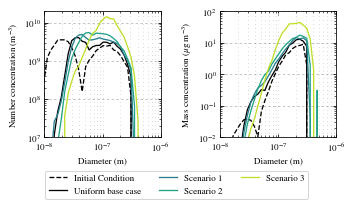

In [14]:
fig, axs = plt.subplots(1,2 , figsize=(5, 2.5))
print('Number concentration:')
axs[0] = plot_ScenarioDists(dist_type='num', k=60, times=[36], local_binning=10, ylims=(1e7, 2e10), xlims=(1e-8, 1e-6), yscale='log',
legend_ncol=1, legend_loc='upper right', label_size=9, line_width=1.3, grid_linewidth=.6, ax=axs[0], write_legend_labels=False, 
return_ax=True, savefig=False)

print('\nMass concentration:')
axs[1] = plot_ScenarioDists(dist_type='mass', k=60, times=[36], local_binning=10, ylims=(1e-2, 1e2), xlims=(1e-8, 1e-6), yscale='log',
legend_ncol=1, legend_loc='upper right', label_size=9, line_width=1.3, grid_linewidth=.6, ax=axs[1], return_ax=True, write_legend_labels=True, 
savefig=False)

plt.tight_layout()
fig.legend(fontsize=9, ncol=3, loc='center', bbox_to_anchor=(.5,-.05))

plt.savefig(f'combined_num_mass_conc_i50_j50_k60.pdf', format='pdf', bbox_inches='tight')


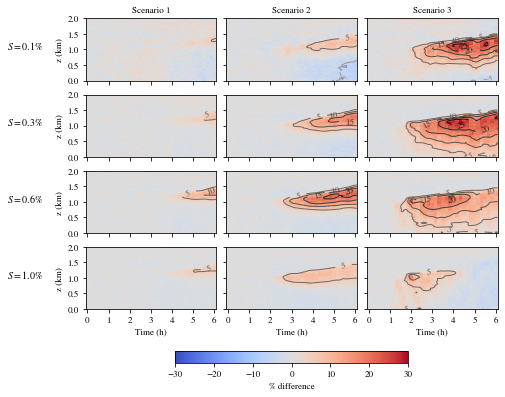

In [15]:
vmin = -30
vmax = 30
# smoothing sigma previously set to 0.6
plotMultiScenarioCCNPercentDiff(vmin, vmax,  fig_xsize=6.9, fig_ysize=5.42, #plot_significance=True,
                   plot_contours=True, n_contours=13, contour_min=-30, contour_max=30, contour_label_fontsize=9, 
                   smooth_contours=True, contour_smoothing_sigma=.8, contour_linewidth=1,
                   xtick_delta_t=1, xtick_units='h',
                   savefig=True
                   )

/tmp/ipykernel_128008/2903168611.py:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad('white')#'#dedede')


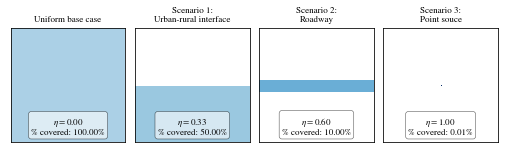

In [80]:
domain_x_cells = 100
domain_y_cells = 100

spatial_het_dir = '/data/keeling/a/sf20/b/wrf-partmc-spatial-het/WRFV3/test/em_les/spatial-het'
sh_dataset = pd.read_csv(f'{spatial_het_dir}/sh_patterns_xres{domain_x_cells}_yres{domain_y_cells}_exact.csv', header=0)

shdir = 'sh-patterns'
griddir = f'xres{domain_x_cells}yres{domain_y_cells}'

fig, axs = plt.subplots(1, 4, figsize=(6.9, 3), layout='constrained')
cmap = plt.cm.get_cmap('Blues')
cmap.set_bad('white')#'#dedede')

analysis_scenarios = ['uniform-basecase', 'fx1fy0', 
                      'road-10x','point-source-1x1'
                     ]

scenario_fmt_names = ['Uniform base case', 'Scenario 1:\nUrban-rural interface', 'Scenario 2:\nRoadway', 'Scenario 3:\nPoint souce']

i = 1

for ax, scenario, scenario_fmt in zip(axs.flatten(), analysis_scenarios, scenario_fmt_names):
    nshval = sh_dataset[sh_dataset.scenario == scenario].NSH.values[0]
    ax.set_xticks([])
    ax.set_yticks([])
    filename = f'{scenario}.csv'
    array_path = os.path.join(spatial_het_dir, shdir, griddir, filename)
    scenario_arr = np.genfromtxt(array_path, delimiter=',')
    scaling_factor = sh_dataset[sh_dataset.scenario == scenario]["scaling-factor"].values[0]
    scenario_arr = scaling_factor*scenario_arr
    vmin=.01
    vmax=10000
    ax.pcolormesh(scenario_arr, norm=mplcolors.LogNorm(vmin, vmax), edgecolor='face',
                  #norm=mplcolors.Normalize(vmin,vmax),
                  cmap=cmap)
    meanval = scenario_arr.mean()
    variance = scenario_arr.std()**2

    if scenario == 'uniform-basecase':
        title_name = 'Uniform Base Case'
    else:
        title_name = f'Scenario {i}'
        i += 1
    ax.set_title(scenario_fmt, fontsize=9)
    ax.text(x=.5, y=.07, s=f'$\eta={nshval:3.2f}$\n% covered: {100/scaling_factor:3.2f}%',
            fontsize=9, linespacing=1,
            horizontalalignment='center', transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=.6, boxstyle='round', lw=.6))
    #ax.text(x=.5, y=.07, s=f'$SH={nshval:3.2f}$\n$\overline{{f}}(S)={meanval:3.2f}$\n$\sigma^2={variance:3.2f}$',
    #        fontsize=7.5, linespacing=1,
    #        horizontalalignment='center', transform=ax.transAxes,
    #        bbox=dict(facecolor='white', alpha=.6, boxstyle='round', lw=.6))
    ax.set_aspect('equal', adjustable='box')
    
plt.savefig(f'SH-scenarios.pdf', format='pdf', bbox_inches='tight')
